## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
#Part 1
import numpy as np
import pandas as pd

cars = pd.read_csv('knn/data/USA_cars_datasets.csv', low_memory=False)
cars = cars.loc[:,['price','year','mileage'] ]
cars

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654
...,...,...,...
2494,7800,2019,23609
2495,9200,2018,34553
2496,9200,2018,31594
2497,9200,2018,32557


> I found no missing values or values in the wrong format

In [2]:
#Part 2

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

cars['year'] = maxmin(cars['year'])
cars['mileage'] = maxmin(cars['mileage'])

In [3]:
#Part 3

from sklearn.model_selection import train_test_split
y = cars['price']
X = cars.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

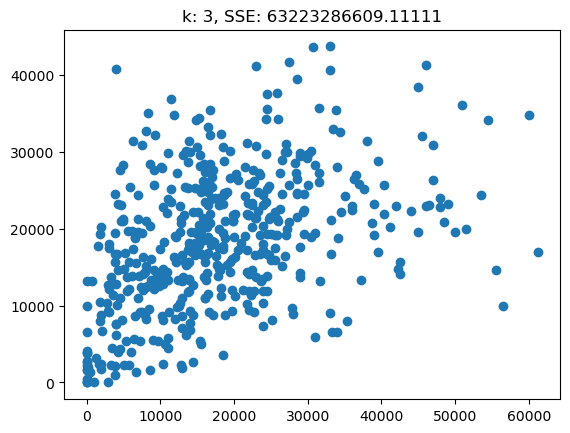

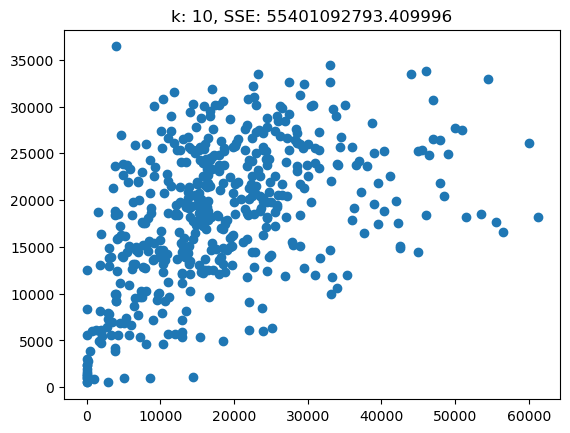

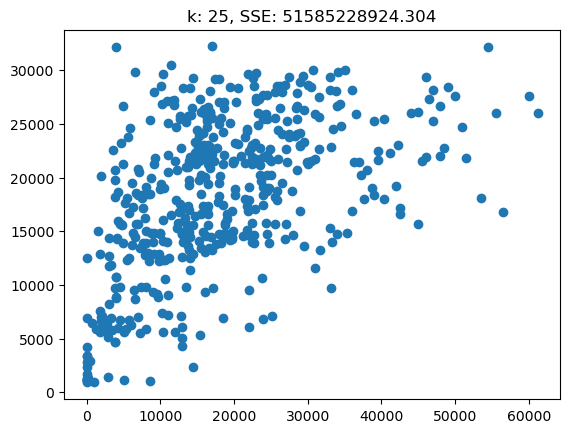

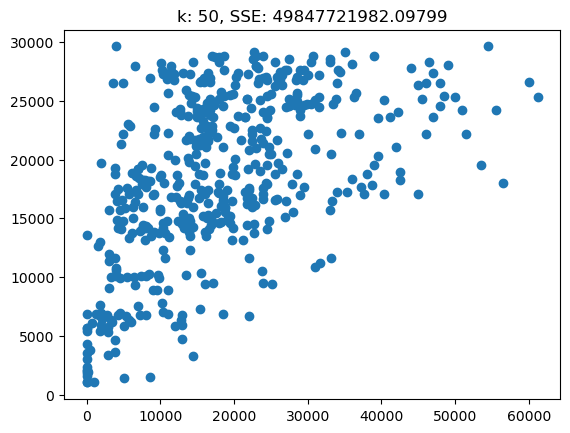

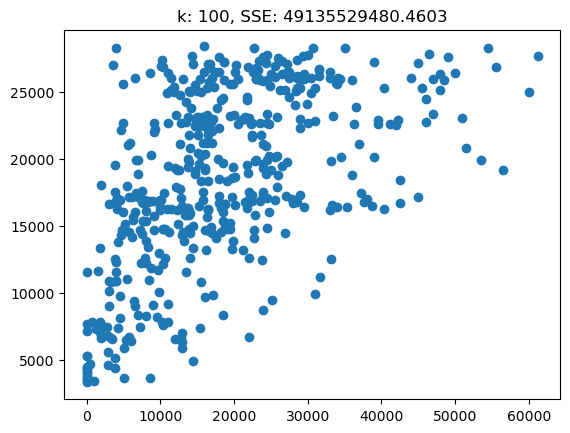

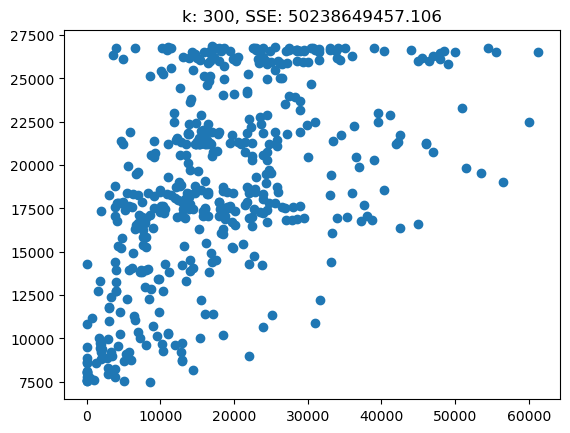

In [4]:
#Part 4

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k)
    predictor = model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    plt.show()

> At first, as k increases, the standard error decreases, but after k=100, the standard error begins to increase once more. 

In [5]:
#Part 5

k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar) 

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    predictor = model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )
    
SSE_min = np.min(SSE)
a = np.where(SSE==SSE_min)
k_star = k_grid[a]
print(k_star)

[77]


Part 6

>As we saw the error decrease as k increased to 100, but increase after k increased past 100, we could assume that the optimal k would be between k=50 and k=100. Thus when we found the optimal k to be equal to 77, we could say that the values of k below 77 (3,10,25, and 50) were "underfitting" the data and the values over 77 (100 and 300) were "overfitting" the data.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data. The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.
1. Load the data. Perform some EDA, summarizing the target label and the features.,\
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?,
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [6]:
#Part 1

mines = pd.read_csv('knn/data/land_mines.csv', low_memory=False)
print(mines.describe())
mines.head()

          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


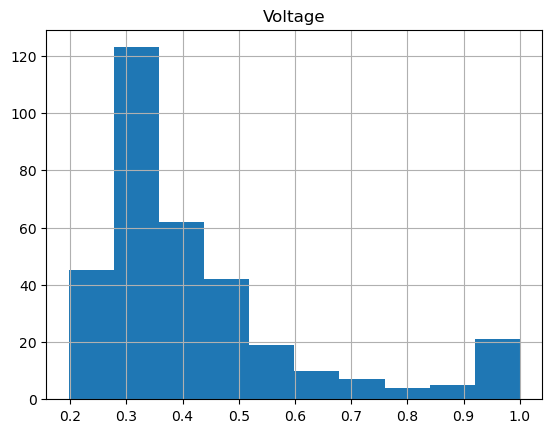

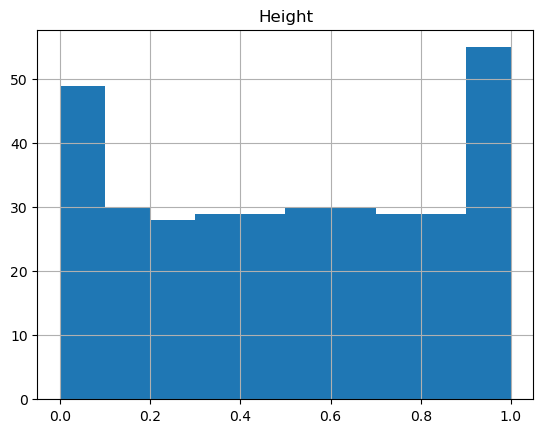

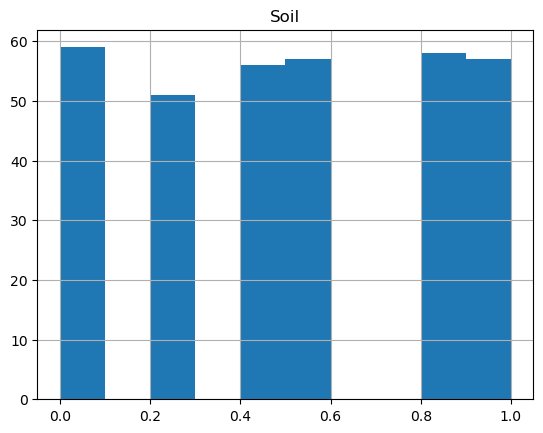

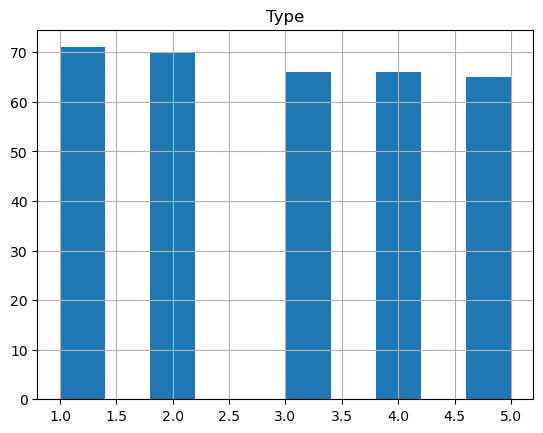

In [7]:
mines['voltage'].hist()
plt.title('Voltage')
plt.show()

mines['height'].hist()
plt.title('Height')
plt.show()

mines['soil'].hist()
plt.title('Soil')
plt.show()

mines['mine_type'].hist()
plt.title('Type')
plt.show()

In [8]:
#Part 2

y = mines['mine_type']
X = mines.loc[:,['voltage','height','soil']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state=100)

In [9]:
print(len(y_train), len(y_test))

169 169


In [10]:
#Part 3

k_bar = 169
k_grid = np.arange(1,k_bar) # The range of k's to consider
accuracy = np.zeros(k_bar) 

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    predictor = model.fit(X_train.values, y_train)
    y_hat = model.predict(X_test.values)
    accuracy[k] = np.sum( y_hat == y_test )/169
    
accuracy_max = np.max(accuracy)
a = np.where(accuracy==accuracy_max)
k_star = a[0]+1
print(k_star, accuracy_max)


[1] 0.3254437869822485


> I selected a value for k which gave me the greatest accuracy rating possible.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
predictor = model.fit(X_train.values,y_train)
y_hat = predictor.predict(X_test.values)

In [15]:
#Part 4

confusion_table = pd.crosstab(y_hat, y_test)
confusion_table

mine_type,1,2,3,4,5
row_0,,,,,
1,11,0,4,10,8
2,0,21,0,2,0
3,10,4,9,7,9
4,6,6,5,9,6
5,11,4,15,7,5


> Accuracy is not very high (just over 30%) and that is reflected in the confusion table. When 1 is predicted, the prediction is sometimes right but also will confuse 1 with 3,4, or 5 almost just as often. When it predicts 2, the prediction is almost always right. When 3, 4, or 5, it could actually be any of the mine types, with predictions for 5 being especially bad as it rarley actually is 5. 

Part 5

> If I was advising someone to use this predictive model, I would show them my results in the confusion table, explaining that the predictive model is not very accurate unless they are trying to predict the 2nd mine type. 